# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цели исследования:**

- определить временные рамки для быстрой, нормальной и долгой продаж.
- Определить какие из факторов большего всего влияют на стоимость квартиры.
- Определить как изменяется стоимость квартир при отдалении от центра Санкт-Петербурга.

**Ход исследования:**
Работа будет проходить в 5 этапов:
- Обзор данных.
- Предобработка данных. Для выявления ошибок, аномали и обработки их.
- Расчёты и добавление результатов в таблицу. Добавление необходимых для исследования дополнительных расчётных столбцов.
- Исследовательский анализ данных.
- Выводы

### Откройте файл с данными и изучите общую информацию

In [115]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [116]:
# читаем и записываем данные в переменную для дальнейшего анализа
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#выводим 10 первых строк для ознакомления с данными
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Из документации к файлу прикладываем описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [117]:
# ознакомимся с информацией о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из инфоормации о данных об объектах недвижимости видно, что датасет имеет много пропусков.
А ещё есть вопросы к типам данных в столбцах:
- столбец с ценой на момент снятия с публикации имеет тип данных float64, когда как в столбце цельночисленные значения, 
- в столбце сколько дней было размещено объявление (от публикации до снятия) данные типа object, которые требуется перевести в тип datetime для работы с этими данными,
- в столбце об этажности дома тип данных float64, когда как в столбце цельночисленные значения,
- в столбце is_apartment данные типа object, когда как в нём должен быть булев тип,
- в столбце о числе балконов тип данных float64, когда как дробного значения числа болконов не существует,
- в столбце сколько дней было размещено объявление тип данных float64, когда как дни не могут иметь дробную часть.

Требуется предобработка описанных выше столбцов и пропусков вданных для последующиего анализа. 

In [118]:
# оознакомимся со сводной статистикой исследуемых данных 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


#### В предоставленных для анализа данных есть выбросы. А именно:
- в столбце о цене на момент снятия с публикации. Минимальное значение: 12190. Это явная ошибка в записи данных, поскольку недвижимоть в Санкт - Петербурге и Ленинградской области минимум на 2 порядка (в 100 раз) выше, чем указанное значение. Максимальное значение: 763000000. Данная стоимость за объект недвижимости в данном регионе мало вероятна, даже если указанный объект находится в элитном районе (центр или Крестовский остров) и представляет собой частный дом с ремонтом и полной мебелировкой. К тому же, исходя из документации о данных, объекты в данном датасете именно квартиры.
- в столбце об общей площади объекта минимальное значение составляет 12 м², такую площадь, обычно, имеют комнаты или переделанные в студии комнаты в коммунальных квартирах. Мaксимальное же значение - 900 м². Самая большая квартира в Питере имеет площадь 903.5 м². Таких больших квартир всего 30 на весь СПб.  
- в столбце с числом комнат минимальное значение 0, что, вероятно, соответветствует числу комнат для объектов типа квартира - студия. Максимальное значение же - 19. В Санкт - Петербурге существуют квартиры с таким количеством комнат, но их небольшое количество, они располагаются в доходных домах старого фонда.
- в столбце о высоте потолков минимальное значение - 1 м. Это явная ошибка в записи данных, По СНиП 2.08.01-89 «Жилые здания», который регулирует минимальные стандарты для высоты потолков в жилых квартирах минимальная высота потолка составляет 2,5 м. Максимальное же значение - 100 м. Такая высота потолка маловероятна, поскольку даже в старом фонде и недвижимости Петербурга и в двухярусных квартирах максимальная высота потолка не превышает 6.5 м.
- в столбце с этажностью дома максимальное значение 60 этажей, когда как самый высокий жилой дом в исследуемом регионе имеет этажносьть в 36 этажей. При этом минимальное значение в данном столбце - 1. Одноэтажные дома в исследуемом регионе существуют и представляют собой объекты старого фонда.
- в столбце с жилой площадью минимальное значение 2 м², что говорит о явной ошибке. Такой жилой площади для квартир не существует. Максимальное же значение 409,7 м², похоже на значение значение жилой площади одной из 30 самых больших квартир, поскольку у самой большой квартиры в СПб жилая площадь составляет 528 м².
- в столбце с площадью кухни минимальное значение 1,3 м². Такой площадь кухонной комнаты не существует. Максимальное же значение - 112 м², которое вполне может быть у элитных квартир площадью, сравнимой с площадью дома.
- в столбце с расстоянием до аэропорта минимальное значение - 0 м. Такое расстояние до аэропорта невозможно. 
- в столбце с числом дней, сколько было размещено объявление минимальное значение = 1. Вероятность продать квартиру за 1 день крайне мала, но не равна 0. Особенно если объект продают по хорошей цене. А максимальное значение - 1580 дней. Такое количество дней соответствует сроку продажи - более 4 лет. Такая длительная продажа возможна, особенно в кризисное время, но так же мало вероятна.

Описанные выше данные будут негативно влиять на средние значения внути групп, поэтому с ними требуется поработать.

Построим гистограммы распределения значений по необработанным данным.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

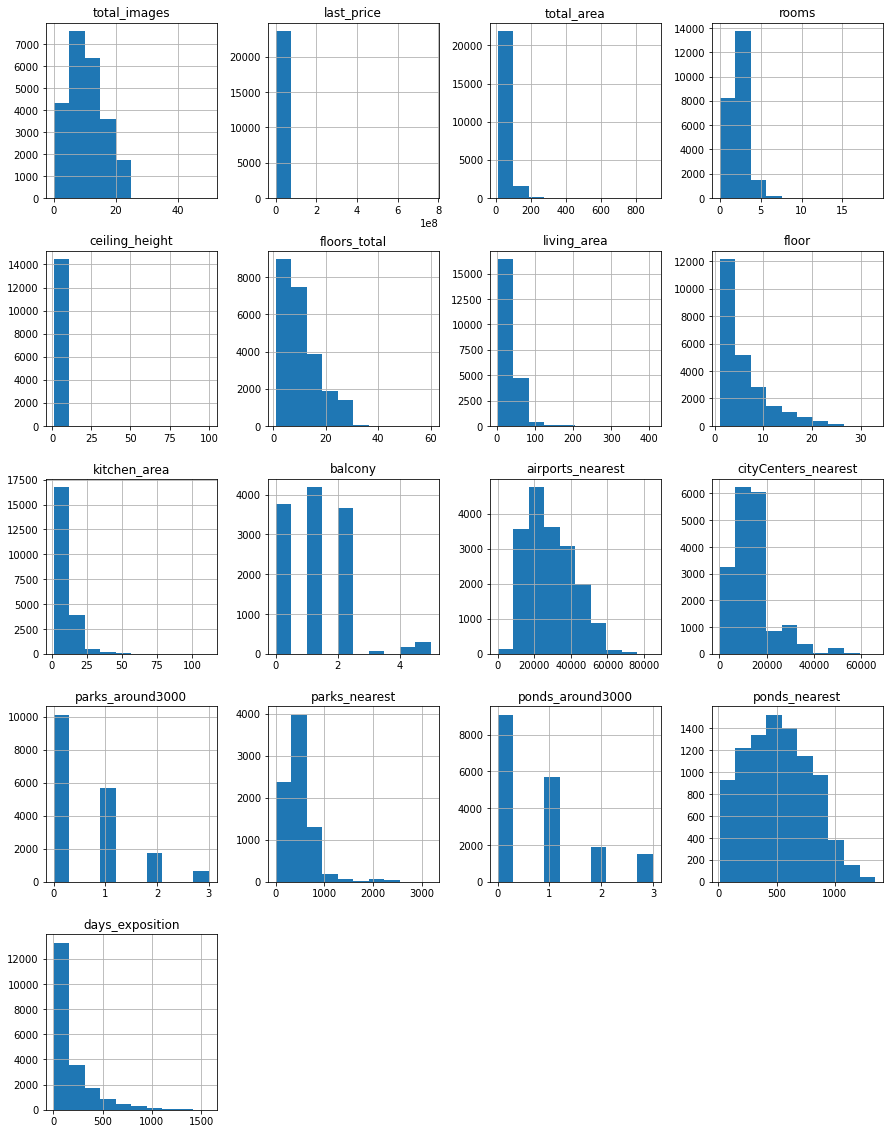

In [119]:
data.hist(figsize=(15, 20))

### Выполните предобработку данных

Определим количество пропусков в каждом из столбцов.

In [120]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В предоставленных для исследования данных обнаружены пропуски в следующих столбцах:
- ceiling_height - высота потолков. Количество пропусков: 9195.
- floors_total - количество этажей в доме. Количество пропусков: 86.
- living_area - жилая площадь. Количество пропусков: 1903.
- is_apartment - апартаменты. Количество пропусков: 20924. Пропуски в данном столбце, вероятно, обусловлены тем, что продавцы указывают тип недвижимости - "апартаменты", а для остальных объектов данная графа не заполняется, так как продаваемая недвижимость имеет другой тип, а именно, "квартира".
- kitchen_area - площадь кухни. Количество пропусков: 2278. Пропуски в данном столбце могут быть обусловлены тем, что в квартирах типа "студия" нет отдельного помещения - кухни.
- balcony - число балконов. Количество пропусков: 11519. Пропуски в данном столбце могут быть обусловлены тем, что у объектов недвижимости с пропуском нет балкона.
- locality_name - название населённого пункта. Количество пропусков: 49. Вполне вероятно, что данные объекты могут не относиться к Санкт - Петербургу и Ленинградской области.
- в столбцах о ближайшем аэропоорте, расстоянии до центра города, ближайших парках и водоёмах, парках и водоёмах на расстоянии 3 км,  заполняемых с помощью геосервисов:
    - airports_nearest. Количество пропусков: 5542
    - cityCenters_nearest. Количество пропусков: 5519
    - parks_around3000. Количество пропусков: 5518
    - parks_nearest. Количество пропусков: 15620
    - ponds_around3000. Количество пропусков: 5518
    - ponds_nearest. Количество пропусков: 14589
      Пропуски в данных столбцах могут быть обусловлены, либо проблемами с определением геопозиции объекта, либо, как часто делают мошенники, в объявлении не указан адрес, а только город или населенный пункт. 
    
- days_exposition - сколько дней было размещено объявление (от публикации до снятия). Пропуски в данном столбце говорят о том, что 3181 объект, скорее всего, еще не снят с продажи или по какой - то причине не было засчитанно количество дней программой.

#### Заполняем пропуски, устраняем выбросы

Заполним пропуски в столбцах is_apartment и balcony. 

In [121]:
size_data = data.shape
size_data

(23699, 22)

In [122]:
data['is_apartment'].fillna(data['is_apartment'] == False, inplace=True)
data['balcony'].fillna(0, inplace=True)

 Удалим пропуски в названиях населённых пунктов.

In [123]:
data.dropna(subset=['locality_name'], inplace=True)

Заполним пропуски в столбце о высоте потолков. Для этого создадим срез данных для выделения именно тех объявлений, где значения высот потолков находятся  до 6.5 м - максимальная высота потолка объекта недвижимости в старом фонде и для двухуровневых квартир. 
Однако нижняя граница высоты потолков в данном исследовании не задается. 
Но перед этим хотим посмотреть какие данные не попадут в срез.

In [124]:
data1 = data.query('ceiling_height>6.5')
data1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,False,False,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,False,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Строки с высотами потолков от 22 м до 32 м похожи на ошибки в записи значений. Предполагаем, что высоты должны быть записаны как 2.5, 2.6 и т.д. до 3.2 м включительно. 

In [125]:
data.loc[(data['ceiling_height'] >= 22) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] * 0.1

In [126]:
data.update(data[(data['ceiling_height'] >= 22) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

Часть аномальных значений обработана, теперь создадим срез без явных  выбросов в высотах потолков и заполним пропуски медианным значением.

In [127]:
ceil_median = data['ceiling_height'].median()
data['ceiling_height'].fillna(ceil_median, inplace=True)
ceil_data = data.query('ceiling_height <=6.5')
ceil_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Обработаем аномалии и пропуски в столбце с числом этажей в доме.
Максиммальная этажность жилого объекта в СПб 36 этажей. Поэтому удалим строки, не подходящие под данное условие. 

In [128]:
pd.options.mode.chained_assignment = None
floor_data = ceil_data.query('floors_total < = 36')

floor_median = ceil_data['floors_total'].median()
floor_data['floors_total'].fillna(floor_median, inplace=True)
floor_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Найдем количество пропущенных значений о площади кухни в квартирах - студиах. В таком виде недвижимости отдельного помещения - кухни не предусмотрено, поэтому заполняем 0.

In [129]:
pd.options.mode.chained_assignment = None
studio_data = floor_data.query('studio == True')
studio_data['kitchen_area'].fillna(0, inplace = True)
floor_data.loc[floor_data['studio']== True, 'kitchen_area'] = studio_data['kitchen_area']

Остальные пропуски же заменим медианным значением площади кухни, а также уберем значения площади кухни <5 м², поскольку для квартир, которые не являются студиями, минимальное значение площади кухни - 5 м².  

In [130]:
zero_data = floor_data.query('kitchen_area == 0')
kitchen_data = floor_data.query('kitchen_area >=5')
kitchen_median = kitchen_data['kitchen_area'].median()
kitchen_data['kitchen_area'].fillna(kitchen_median , inplace=True)
kitchen_data = kitchen_data.append(zero_data, sort = False)

Посмотрим на количество оставшихся пропусков:

In [131]:
kitchen_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21376 entries, 0 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21376 non-null  int64  
 1   last_price            21376 non-null  float64
 2   total_area            21376 non-null  float64
 3   first_day_exposition  21376 non-null  object 
 4   rooms                 21376 non-null  int64  
 5   ceiling_height        21376 non-null  float64
 6   floors_total          21376 non-null  float64
 7   living_area           20932 non-null  float64
 8   floor                 21376 non-null  int64  
 9   is_apartment          21376 non-null  bool   
 10  studio                21376 non-null  bool   
 11  open_plan             21376 non-null  bool   
 12  kitchen_area          21376 non-null  float64
 13  balcony               21376 non-null  float64
 14  locality_name         21376 non-null  object 
 15  airports_nearest   

Остались пропуски в столбце жилой площади. Здесь тоже есть аномальные  значения. Минимальная же жилая площадь квартиры по СНиП составляет 14 м². Уберем аномалии и заполним пропуски. Но перед эти посмотрим на значения жилой площади менее 14 м²

In [132]:
kitchen_data1 = kitchen_data.query('living_area < 10.0')
kitchen_data1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.3,7,False,False,False,6.3,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.00,2017-10-31T00:00:00,1,2.65,8.0,9.0,2,False,False,False,23.0,0.0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.00,2017-01-29T00:00:00,2,2.70,25.0,9.0,15,False,False,False,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.40,2017-06-15T00:00:00,2,2.60,9.0,8.4,6,False,False,False,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.00,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,False,False,False,11.0,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.80,2017-06-19T00:00:00,1,2.70,23.0,9.0,15,False,False,False,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
7312,8,3400000.0,27.00,2018-02-21T00:00:00,2,2.50,15.0,9.0,4,False,False,False,16.0,0.0,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.00,2017-10-25T00:00:00,2,2.65,5.0,9.0,2,False,False,False,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.00,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,False,False,False,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
15833,20,4600000.0,33.00,2017-01-01T00:00:00,1,2.70,22.0,9.0,12,False,False,False,14.3,1.0,Санкт-Петербург,33803.0,13671.0,0.0,NaN,0.0,NaN,511.0


Значения 2.0, 3.0, 5.4 и 6.0 очень похожи на ошибки в записи значений, скорее всего, здесь должны быть 20, 30, 54 и 60.
Если посмотреть на площадь кухни у объектов с малой жилой площадью, можно увидеть, что кухня подозрительно большая, посравнению с жилой площадью. Скорее всего, пользователи сервиса невнимательно заполняли данные графы - вместо жилой площади вписали кухню, вместо кухни - жилую площадь. 

In [133]:
kitchen_data.loc[(kitchen_data['living_area'] >= 2.0) & (kitchen_data['living_area'] <= 6.0), 'living_area'] = kitchen_data['living_area'] * 10

Заполним значения living_area медианой.

In [134]:
living_data = kitchen_data.query('living_area >= 14')

living_median = kitchen_data['living_area'].median()
living_data['living_area'].fillna(living_median , inplace=True)
living_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22832,5,2600000.0,28.0,2018-12-14T00:00:00,0,2.60,16.0,16.8,9,False,True,False,0.0,0.0,Санкт-Петербург,19372.0,22796.0,0.0,NaN,1.0,406.0,NaN
22867,8,3090000.0,30.0,2017-12-17T00:00:00,0,2.65,25.0,18.2,5,False,True,False,0.0,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.0,2017-10-26T00:00:00,0,2.70,19.0,18.0,10,False,True,False,0.0,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.0,2017-09-01T00:00:00,0,2.65,25.0,18.0,16,False,True,False,0.0,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0


Заполнять пропуски в столбцах, заполненных автоматически исходя из геолокации, **не будем**, поскольку в данном случае заполнение медианным значением данных пропусков будет не показательно, так как в датасете объекты из разных населённых пунктов Ленинградской области имеющих разное расстояние до Санкт - Петербурга, и имеющие разные географицеские особенности.
Так же столбец о снятии объявления с доски объявления **не будем** заполнять, поскольку объекты могут быть еще не проданы и неизвестно сколько дней они будут продаваться, а заполнять медианой такое количество данных не лучшая идея, поскольку когда объекты продадутся, медиана может, может и незначительно, поменяться.

Вернемся к аномальным значениям. Посмотрим что ещё осталось обработать и каким образом мы можем их обработать. 

In [135]:
living_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,20660.0,1.009831e+01,5.679797e+00,0.0,6.0,10.00,14.0,50.0
last_price,20660.0,6.531597e+06,9.654477e+06,12190.0,3500000.0,4700000.00,6800000.0,420000000.0
total_area,20660.0,6.072959e+01,3.462666e+01,18.0,40.8,52.70,70.0,900.0
rooms,20660.0,2.097773e+00,1.074875e+00,0.0,1.0,2.00,3.0,19.0
ceiling_height,20660.0,2.697734e+00,2.246503e-01,1.0,2.6,2.65,2.7,6.0
floors_total,20660.0,1.057217e+01,6.496732e+00,1.0,5.0,9.00,15.0,36.0
living_area,20660.0,3.489131e+01,2.192356e+01,14.0,19.0,30.30,42.8,409.7
floor,20660.0,5.842256e+00,4.807827e+00,1.0,2.0,4.00,8.0,33.0
kitchen_area,20660.0,1.043802e+01,5.867493e+00,0.0,7.0,9.00,11.9,112.0
balcony,20660.0,6.236689e-01,9.722174e-01,0.0,0.0,0.00,1.0,5.0


Обработаем аномалии в ценах объектов. 
В столбце с ценой объекта на момент продажи есть аномальное значение 12190.0. Таких цен на недвижимость в Лен. области не существует. Поэтому удалим данную строку.
Максимальное же значение оставим, в Петербуре действительно существует элитное дорогое жильё, огромной площадью и с очень нескромной ценой.

In [136]:
price_data = living_data.query('last_price > 12190.0')

Аномальное значение в столбце airports_nearest. Расстояние до аэропорта не может быть равно 0, так как строить жилые здания на такой удалённости к аэропорту нельзя.

In [137]:
clean_data = price_data.query('airports_nearest != 0.00')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20658 entries, 0 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20658 non-null  int64  
 1   last_price            20658 non-null  float64
 2   total_area            20658 non-null  float64
 3   first_day_exposition  20658 non-null  object 
 4   rooms                 20658 non-null  int64  
 5   ceiling_height        20658 non-null  float64
 6   floors_total          20658 non-null  float64
 7   living_area           20658 non-null  float64
 8   floor                 20658 non-null  int64  
 9   is_apartment          20658 non-null  bool   
 10  studio                20658 non-null  bool   
 11  open_plan             20658 non-null  bool   
 12  kitchen_area          20658 non-null  float64
 13  balcony               20658 non-null  float64
 14  locality_name         20658 non-null  object 
 15  airports_nearest   

#### Работаем с типами данных, убираем дубликаты

Изменим типы данных в столбцах таблимцы: last_price, floors_total, floor, balcony, parks_around3000, ponds_around3000 и days_exposition имеют цельночисленные значения, поэтому переведём их в формае int. Столбец first_day_exposition требуется перевести в формат datetime.

In [138]:
clean_data['last_price'] = clean_data['last_price'].astype('int64')
clean_data['floors_total'] = clean_data['floors_total'].astype('int64')
clean_data['floor'] = clean_data['floor'].astype('int64')
clean_data['balcony'] = clean_data['balcony'].astype('int64')
clean_data['parks_around3000'] = np.floor(pd.to_numeric(clean_data['parks_around3000'], errors='coerce')).astype('Int64')
clean_data['ponds_around3000'] = np.floor(pd.to_numeric(clean_data['ponds_around3000'], errors='coerce')).astype('Int64')
clean_data['days_exposition'] = np.floor(pd.to_numeric(clean_data['days_exposition'], errors='coerce')).astype('Int64')
clean_data['first_day_exposition'] = pd.to_datetime(clean_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Убедимся, что форматы данных поменялись.

In [139]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20658 entries, 0 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20658 non-null  int64         
 1   last_price            20658 non-null  int64         
 2   total_area            20658 non-null  float64       
 3   first_day_exposition  20658 non-null  datetime64[ns]
 4   rooms                 20658 non-null  int64         
 5   ceiling_height        20658 non-null  float64       
 6   floors_total          20658 non-null  int64         
 7   living_area           20658 non-null  float64       
 8   floor                 20658 non-null  int64         
 9   is_apartment          20658 non-null  bool          
 10  studio                20658 non-null  bool          
 11  open_plan             20658 non-null  bool          
 12  kitchen_area          20658 non-null  float64       
 13  balcony         

In [140]:
clean_data.duplicated().sum()

0

Явных дубликатов в данных не обнаружено. 

Посмотрим, как приведение названий населённых пунктов повлияет на количество дубликатов. 

In [141]:
clean_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'посёлок Парголово', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'поселок Новый Свет', 'деревня Оржицы',
  

In [142]:
clean_data['locality_name'] = clean_data['locality_name'].str.lower() #приводим к нижнему регистру
clean_data['locality_name'] = clean_data['locality_name'].str.replace('ё', 'е') # заменяем ё на е
clean_data['locality_name'] = clean_data['locality_name'].str.replace('городской поселок','поселок городского типа') #меняем название городской поселок на поселок городского типа
clean_data['locality_name'] = clean_data['locality_name'].str.replace('поселок мурино', ' мурино') # меняем название поселка мурино на просто мурино
clean_data['locality_name'] = clean_data['locality_name'].str.replace('деревня кудрово', ' кудрово') # меняем название деревни кудрово на просто кудрово
clean_data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', ' мурино', 'ломоносов',
       'сертолово', 'петергоф', 'пушкин', 'поселок парголово', ' кудрово',
       'колпино', 'гатчина', 'деревня федоровское', 'выборг', 'кронштадт',
       'кировск', 'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'деревня старая',
       'деревня лесколово', 'село путилово', 'ивангород', 'мурино',
       'сланцы', 'шлиссельбург', 'сясьстрой', 'никольское', 'зеленогорск',
       'сосновый бор', 'поселок новый свет', 'деревня оржицы',
       'деревня кальтино', '

Дальнейшее преобразование проводить не будем, поскольку остались такие похожие значения, как «поселок Рябово» и «поселок городского типа Рябово" согласно Яндекс.Картам - это два разных населённых пункта Лен. области.

Проверим наличие дубликатов у уже обработанных данных по названиям населённых пунктов.

In [143]:
clean_data.duplicated().sum() #дубликаты не обнаружены

0

Результатом предобработки стала таблица с числом строк = 20658, когда как исходная таблица имела 23699 строк. Это всего 87.17% от количества строк в датасете. Чтобы увеличить размер выборки, я могу снять фильтрацию по жилой площади, если потребуется.

Для хорошего анализа требуется 90% данных, но поскольку в жилой площади слишком много аномальных значений, мною принято решение их не включать в последующий анализ. Если заказчика не устроит то количество данных, что я использую далее, верну данные аномалии в датасет. Однако такие выбросы могут очень серьёзно повлиять на среднее значение внутри столбца с жилой площадью.   

### Добавьте в таблицу новые столбцы

Добавим в таблицу цену одного квадратного метра. 

In [144]:
clean_data['price_one_meter'] = clean_data['last_price']/clean_data['total_area']
clean_data['price_one_meter'] = np.round(clean_data['price_one_meter'], decimals = 2) 

Определим в какой день недели выложено каждое из объявлений, где 0 - понедельник, 1 - вторник и т.д.

In [145]:
clean_data['dayofweek'] = clean_data['first_day_exposition'].dt.dayofweek

Определим в какой месяца выложено каждое из объявлений

In [146]:
clean_data['month'] = clean_data['first_day_exposition'].dt.month

Определим в какой год выложено каждое из объявлений

In [147]:
clean_data['year'] = clean_data['first_day_exposition'].dt.year

Добавим категоризацию этажей в таблицу с данными

In [148]:
def type_floor(row):
    """
    Функция распределяет данные в столбце по типам этажей: "Первый", "Последний" и "Другие"
    """
    floor = row['floor']
    floors_total = row['floors_total']
    if floor ==1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другие'
clean_data['type_floor']= clean_data.apply(type_floor, axis=1)

Определим расстояние до центра города в километрах

In [149]:
clean_data['center_near'] = clean_data['cityCenters_nearest']/1000
clean_data['center_near'] = np.round(clean_data['center_near'], decimals = 0) 
clean_data['center_near'] = np.floor(pd.to_numeric(clean_data['center_near'], errors='coerce')).astype('Int64')

Проверим как добавились столбцы

In [150]:
clean_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,dayofweek,month,year,type_floor,center_near
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,Другие,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,Первый,19
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,Другие,14
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,Другие,8
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок городского типа янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,95065.79,0,9,2018,Другие,<NA>


### Проведите исследовательский анализ данных

#### Общая площадь объектов недвижимости

Посмотрим описательную статистику для данных об общей площади объектов недвижимости.

In [151]:
clean_data['total_area'].describe().T

count    20658.000000
mean        60.728516
std         34.626230
min         18.000000
25%         40.800000
50%         52.700000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму распределения объектов недвижимости от общей площади

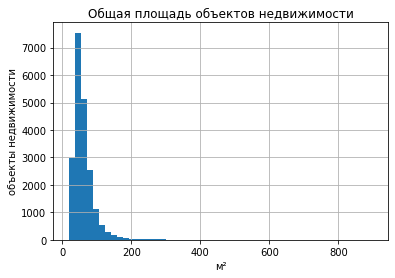

In [152]:
clean_data['total_area'].hist(bins = 50)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Ввиду того, что количество объектов с площадью более 120 м² незначительно. Поэтому построим гистограмму без данных значений.

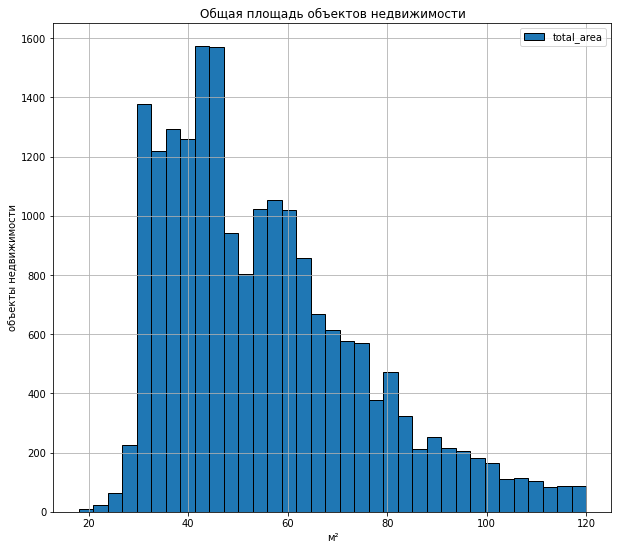

In [153]:
clean_data['total_area'].hist(bins = 35, range  = (18,120), figsize=(10, 9), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеет площадь от 30 до 65 м².
На гистограмме отчетливо видно 2 пика - квартиры площадью 30 м² и квартиры 50-52 м².
Среднее значение - 60.7 м² и медиана 52.7 м² сдвинуты в сторону больших значений.

#### Жилая площадь объектов недвижимости

Посмотрим описательную статистику для данных о жилой площади объектов недвижимости.

In [154]:
clean_data['living_area'].describe().T

count    20658.000000
mean        34.892177
std         21.924358
min         14.000000
25%         19.000000
50%         30.300000
75%         42.800000
max        409.700000
Name: living_area, dtype: float64

Построим гистограмму распределения объектов недвижимости от жилой площади

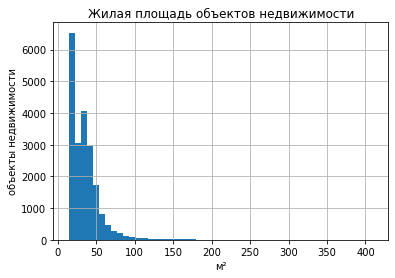

In [155]:
clean_data['living_area'].hist(bins = 50)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Ввиду того, что количество объектов с жилой площадью более 70 м² незначительно. Поэтому построим гистограмму без данных значений.

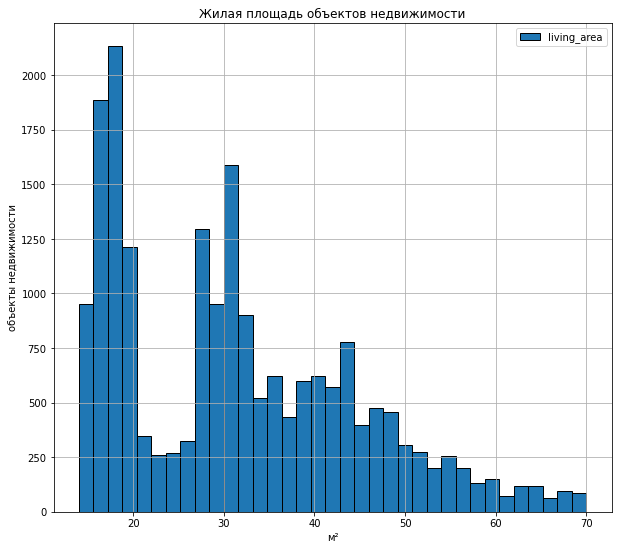

In [156]:
clean_data['living_area'].hist(bins = 35,  range  = (14,70), figsize=(10, 9), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеет жилую площадь от 10 - 17 и 26 - 35 м². На гистограмме отчетливо видно 2 пика - квартиры с жилой площадью 10 - 17 м² и квартиры больше 26 - 35 м². Среднее значение - 34.9 м² и медиана 33.3 м² сдвинуты в сторону больших значений.

#### Площадь кухни объектов недвижимости

Посмотрим описательную статистику для данных о площади кухни объектов недвижимости.

In [157]:
clean_data['kitchen_area'].describe().T

count    20658.000000
mean        10.436776
std          5.863966
min          0.000000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

Построим гистограмму распределения объектов недвижимости от площади кухни

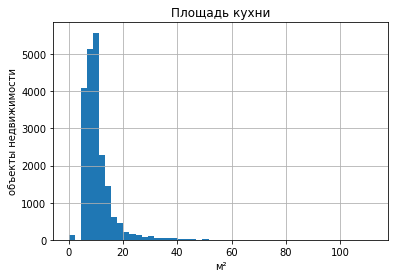

In [158]:
clean_data['kitchen_area'].hist(bins = 50)
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Ввиду того, что количество объектов с жилой площадью более 20 м² незначительно. Поэтому построим гистограмму без данных значений.

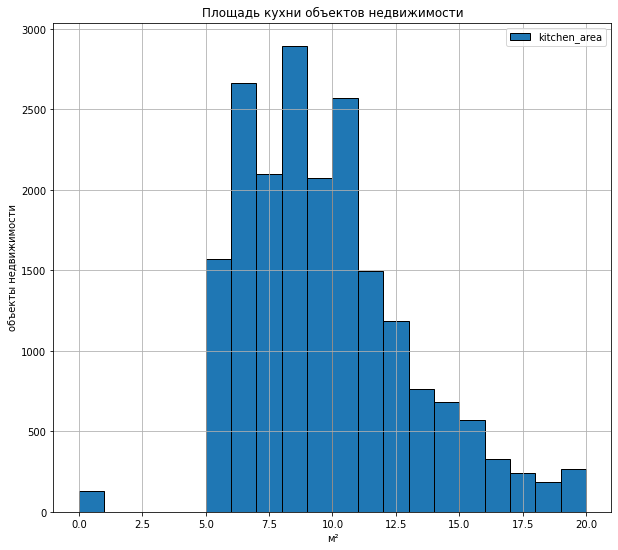

In [159]:
clean_data['kitchen_area'].hist(bins = 20,  range  = (0,20), figsize=(10, 9), ec='black', legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса площадей кухонь находится в диапазоне от 5 до 13 м². Отчетливо видно 3 пика: квартиры с примерной площадью кухни 6 м², 8 м² и 11 м². Среднее значение - 10.4 м² и медиана 9.0 м² сдвинуты в сторону больших значений.

#### Цена объектов недвижимости

Посмотрим описательную статистику для данных о ценах на объекты недвижимости.

In [160]:
clean_data['last_price'].describe().T

count    2.065800e+04
mean     6.531890e+06
std      9.654837e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

Построим гистограмму распределения объектов недвижимости от их цены

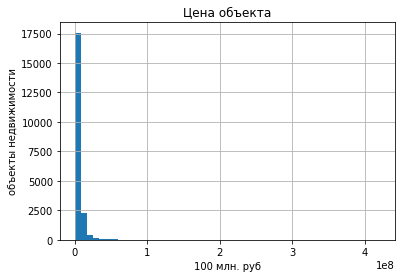

In [161]:
clean_data['last_price'].hist(bins = 50)
plt.title('Цена объекта')
plt.xlabel('100 млн. руб')
plt.ylabel('объекты недвижимости')
plt.show()

Ввиду того, что количество объектов с ценой более 15 млн. рублей незначительно. Поэтому построим гистограмму без данных значений.

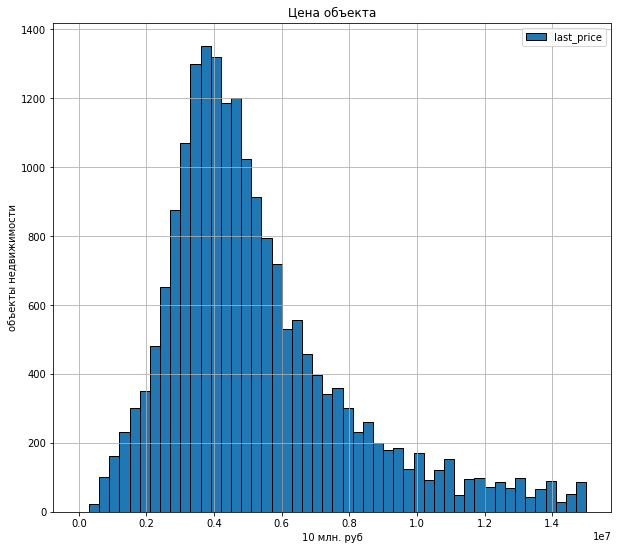

In [162]:
clean_data['last_price'].hist(bins = 50,  range  = (0,15000000), figsize=(10, 9), ec='black', legend=True)
plt.title('Цена объекта')
plt.xlabel('10 млн. руб')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса цен на объекты находится в диапазоне от 2.0 до 7.0 млн. рублей. Отчетливо виден пик: квартиры стоимостью около 3.8 млн. рублей. Среднее значение - 6.5 млн. рублей и медиана 4.7 млн. рублей сдвинуты в сторону больших значений.

 #### Количество комнат в квартире

Посмотрим описательную статистику для данных о количестве комнат в объектах недвижимости.

In [163]:
clean_data['rooms'].describe().T

count    20658.000000
mean         2.097831
std          1.074900
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим гистограмму распределения объектов недвижимости от количества комнат

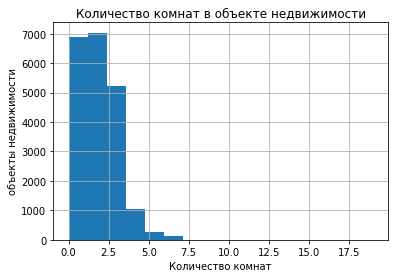

In [164]:
clean_data['rooms'].hist(bins = 16)
plt.title('Количество комнат в объекте недвижимости')
plt.xlabel('Количество комнат')
plt.ylabel('объекты недвижимости')
plt.show()

Ввиду того, что количество объектов с числом комнат выше 6 незначительно. Поэтому построим гистограмму без данных значений.

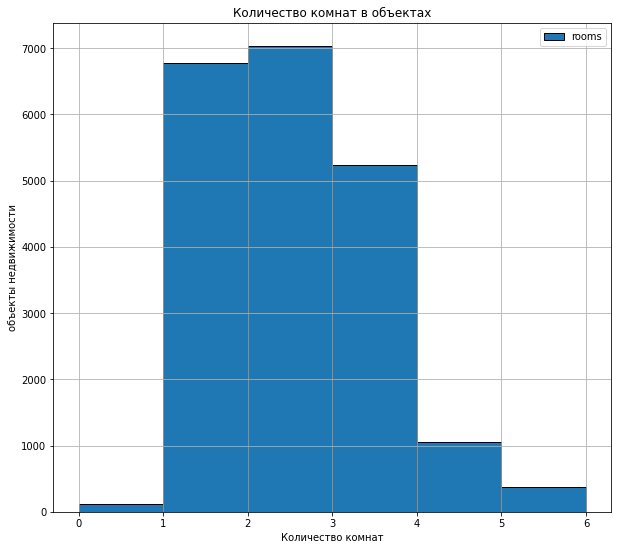

In [165]:
clean_data['rooms'].hist(bins = 6,  range  = (0,6), figsize=(10, 9), ec='black', legend=True)
plt.title('Количество комнат в объектах')
plt.xlabel('Количество комнат')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса квартир представляют собой одно-, двух-, трёх- комнатные объекты.
Но наиболее частый вариант всё же - двух-  комнатная квартира, немногим меньше "однушек". Среднее значение - 2.1 м² и медиана 2.0 м² точно описывают распределение, то есть, квартиры с большим количеством комнат не оказывают влияние на среднее значение.

 #### Высота потолков в объектах недвижимости

Посмотрим описательную статистику для данных о высотах потолков в объектах недвижимости.

In [166]:
clean_data['ceiling_height'].describe().T

count    20658.000000
mean         2.697731
std          0.224661
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

Построим гистограмму распределения объектов недвижимости от высот потолков

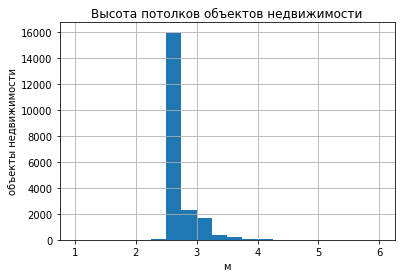

In [167]:
clean_data['ceiling_height'].hist(bins = 20)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Ввиду того, что количество объектов с высотой потолков более 3.3 м незначительно. Поэтому построим гистограмму без данных значений.

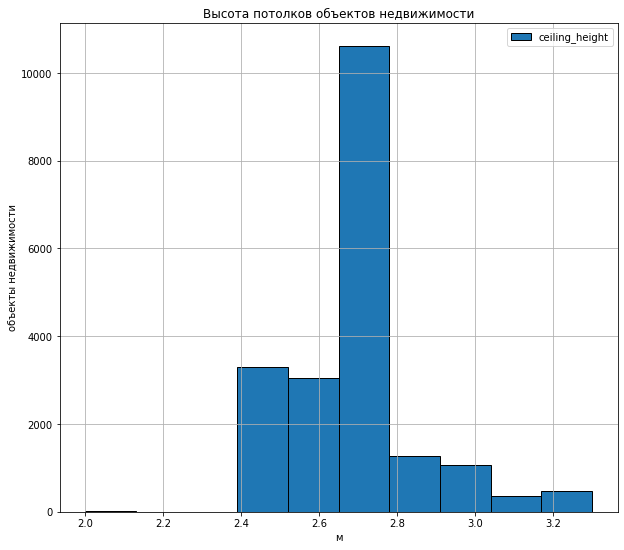

In [168]:
clean_data['ceiling_height'].hist(bins = 10,  range  = (2,3.3), figsize=(10, 9), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса высот потолков находится в диапазоне от 2.4 до 2.75 м. Такое большое количество данных на значении 2.65 обусловлено тем, что допуски заменялись медианой. Поэтому данный график не показательный. 

 #### Сколько этажей в объектах недвижимости и их тип

In [169]:
clean_data['floors_total'].describe().T

count    20658.000000
mean        10.571546
std          6.496262
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         36.000000
Name: floors_total, dtype: float64

Построим гистограмму этажности домов с продаваемыми объектами

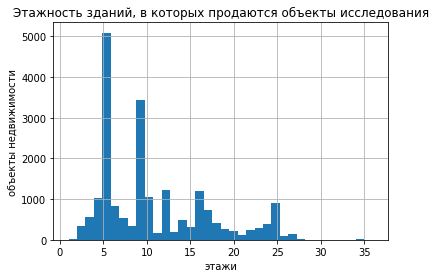

In [170]:
clean_data['floors_total'].hist(bins = 36)
plt.title('Этажность зданий, в которых продаются объекты исследования')
plt.xlabel('этажи')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса объектов находитмся в домах этажностью не более 25. Поэтому построим гистограмму с учетом данного условия. 

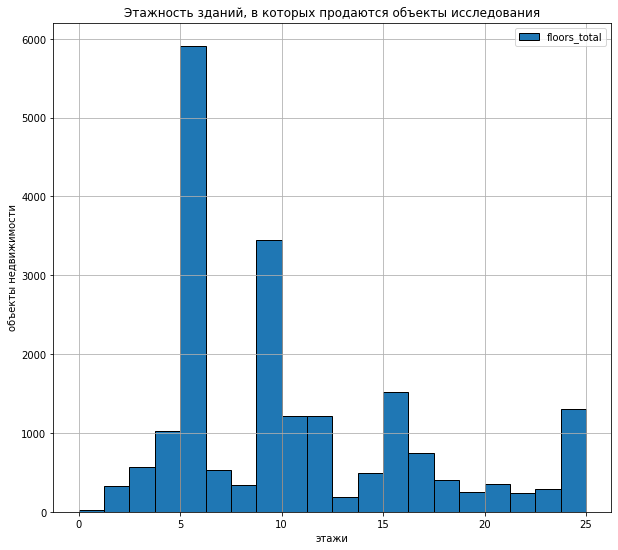

In [171]:
clean_data['floors_total'].hist(bins = 20,  range  = (0,25), figsize=(10, 9), ec='black', legend=True)
plt.title('Этажность зданий, в которых продаются объекты исследования')
plt.xlabel('этажи')
plt.ylabel('объекты недвижимости')
plt.show()

Отчётливо видны 2 пика: 5-ти этажные и 9-ти этажные дома. Большая часть объектов находится в зданиях именно такой этажности. Среднее значение - 10.6 этажа и медиана - 9.0 этажей сдвинуты в сторону больших значений.

Определим к какому типу этажности относятся продаваемые объекты недвижимости. Для начала определим сколько значений в каждой группе.

In [172]:
clean_data['type_floor'].value_counts()

Другие       15206
Последний     2940
Первый        2512
Name: type_floor, dtype: int64

Построим гистограмму для наглядного отображения распределения групп.

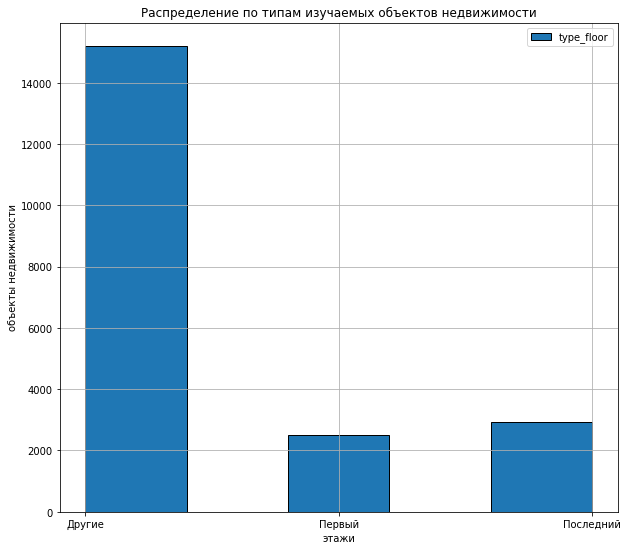

In [173]:
clean_data['type_floor'].hist(bins = 5, figsize=(10, 9), ec='black', legend=True)
plt.title('Распределение по типам изучаемых объектов недвижимости')
plt.xlabel('этажи')
plt.ylabel('объекты недвижимости')
plt.show()

Подавляющее большинство изучаемых объектов недвижимости располагаются не на первом и не на последнем этаже.

#### Этаж объекта недвижимости

Посмотрим описательную статистику для данных об этаже, на котором располагалась продаваемая квартира

In [174]:
clean_data['floor'].describe().T

count    20658.000000
mean         5.841466
std          4.806171
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Построим гистограмму распределения этажей продаваемых квартир

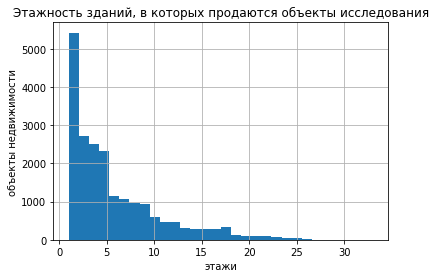

In [175]:
clean_data['floor'].hist(bins = 30)
plt.title('Этажность зданий, в которых продаются объекты исследования')
plt.xlabel('этажи')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса объектов находится на этажах, не превышающих 17. Поэтому построим гистограмму с учетом данного условия. 

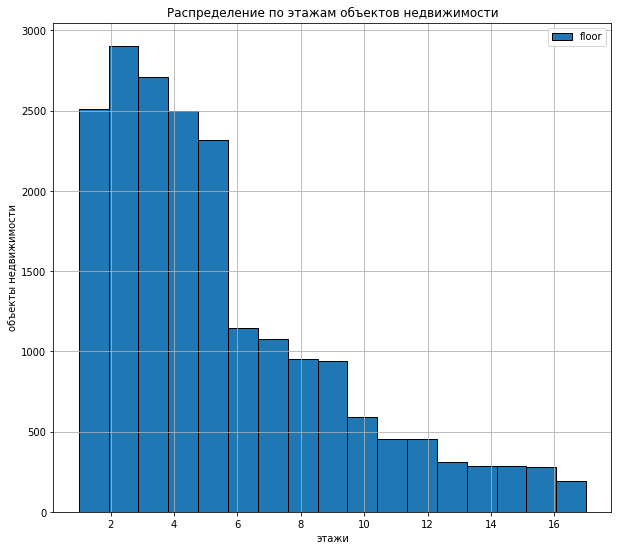

In [176]:
clean_data['floor'].hist(bins = 17,  range  = (1,17), figsize=(10, 9), ec='black', legend=True)
plt.title('Распределение по этажам объектов недвижимости')
plt.xlabel('этажи')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса квартир находится на этажах с 1 до 6. Наиболее частые этажи у ппродаваемых квартир -  2, 3.

4 этаж и 1 этаж встречаются чуть реже, чем описанные ранее значения. Затем идет по частоте - 5 этаж. Среднее значение - 5.8  и медиана 4.0 сдвинуты в сторону больших значений.

#### Расстояние до центра города в метрах

Посмотрим описательную статистику для данных об расстоянии до центра города в метрах

In [177]:
clean_data['cityCenters_nearest'].describe().T

count    16078.000000
mean     14204.183978
std       8615.957688
min        181.000000
25%       9328.000000
50%      13094.000000
75%      16219.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Построим гистограмму распределения удалённости объектов от центра города СПб

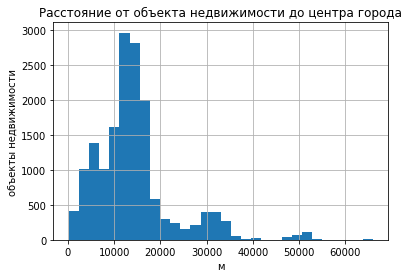

In [178]:
clean_data['cityCenters_nearest'].hist(bins = 30)
plt.title('Расстояние от объекта недвижимости до центра города')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса объектов находится в 35 км от центра СПб. Построим гистограмму именно для этих данных

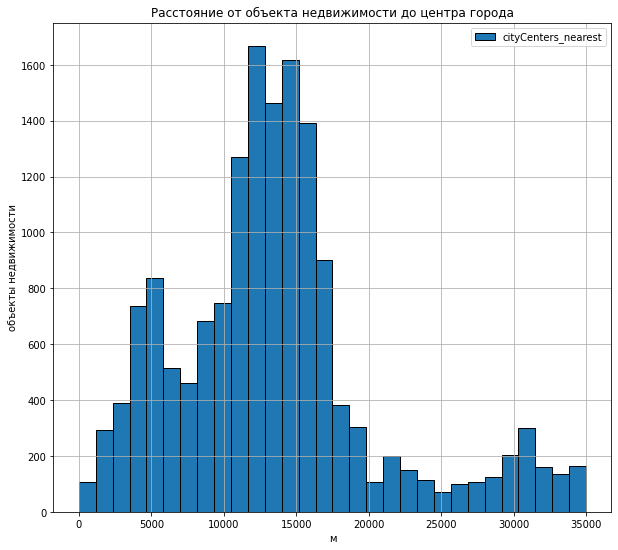

In [179]:
clean_data['cityCenters_nearest'].hist(bins = 30,  range  = (0,35000), figsize=(10, 9), ec='black', legend=True)
plt.title('Расстояние от объекта недвижимости до центра города')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении 11-17 км от центра. Остальные варианты представлены реже. Среднее 14.2 км и медиана 13.1 км точно отражают распределение.

#### Pасстояние до ближайшего парка

Посмотрим описательную статистику для данных об расстоянии до ближайшего парка в метрах

In [180]:
clean_data['parks_nearest'].describe().T

count    7163.000000
mean      487.875332
std       336.714620
min         1.000000
25%       288.000000
50%       454.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Построим гистограмму распределения удалённости объектов от парков

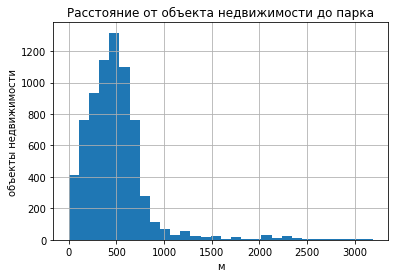

In [181]:
clean_data['parks_nearest'].hist(bins = 30)
plt.title('Расстояние от объекта недвижимости до парка')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Основная масса объектов находится в 1.1 км от парковых зон. Построим гистограмму именно для этих данных

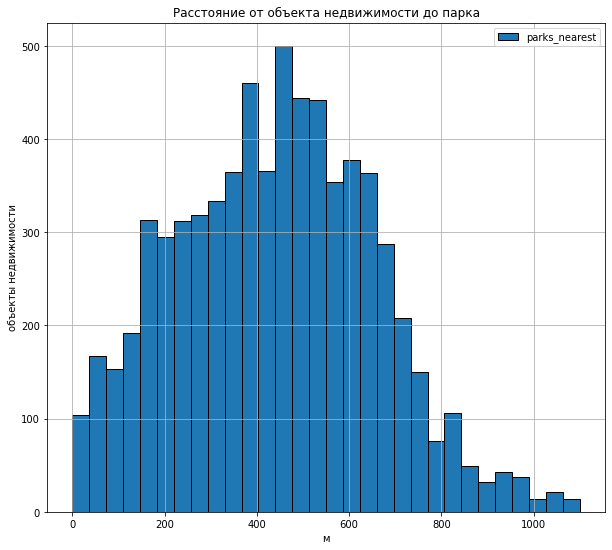

In [182]:
clean_data['parks_nearest'].hist(bins = 30,  range  = (0,1100), figsize=(10, 9), ec='black', legend=True)
plt.title('Расстояние от объекта недвижимости до парка')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов находятся на расстоянии 180 - 700 м до ближайшей парковой зоны. Среднее - 487.9 м и медиана 454.0 м соответствуют распределению.

Вывод: типичный объект недвижимости - квартира общей площадью 30 или 42 - 46 м², жилая площадь же составляет 15 - 18м² или 32 м². Площадь кухни такой квартиры от 6.8 м² до 11.0 м². Стоимостью 4 млн. рублей. Количество комнат в квартире от 1 до 3 включительно. Высота потолков от 2.4 до 2.75 м. Этажность дома, где распологается типичная квартира: 5 - или 9 - этажка. Сама же квартира находится не на первом и не на последнем этажах, а на 2 - 4 этаже. Расстояние до центра города составляет 12 км. Расстояние до ближайшей парковой зоны - около 500 метров.

Изначальный размер датасета 

In [183]:
size_data

(23699, 22)

Размер датасета после предобработки

In [184]:
size_clean_data = clean_data.shape
size_clean_data

(20658, 28)

In [185]:
1 - size_clean_data[0]/size_data[0]

0.12831765053377775

При фильтрации по общей площади доля отброшенных данных

In [186]:
total_clean_data = clean_data.query('total_area<=120').shape
1 - total_clean_data[0]/size_clean_data[0]

0.044437990124891136

Соответственно при фильтрации по общей площади использовано 95.4% данных.

При фильтрации по жилой площади доля отброшенных данных

In [187]:
living_clean_data = clean_data.query('living_area<=70').shape
1 - living_clean_data[0]/size_clean_data[0]

0.047681285700455045

Соответственно при фильтрации по жилой площади использовано 95.2% данных.

При фильтрации по площади кухни доля отброшенных данных

In [188]:
kitchen_clean_data = clean_data.query('kitchen_area<=20').shape
1 - kitchen_clean_data[0]/size_clean_data[0]

0.045357730661245044

Соответственно при фильтрации по площади кухни использовано 95.5% данных.

При фильтрации по цене доля отброшенных данных

In [189]:
price_clean_data = clean_data.query('last_price<=15000000').shape
1 - price_clean_data[0]/size_clean_data[0]

0.049762803756413954

Соответственно при фильтрации по цене использовано 95.0% данных.

При фильтрации по количеству комнат доля отброшенных данных

In [190]:
rooms_clean_data = clean_data.query('rooms<=6').shape
1 - rooms_clean_data[0]/size_clean_data[0]

0.0037757769387162243

Соответственно при фильтрации по количеству комнат использовано 96.2% данных.

При фильтрации по высоте потолков доля отброшенных данных

In [191]:
ceil_clean_data = clean_data.query('ceiling_height<=3.3').shape
1 - ceil_clean_data[0]/size_clean_data[0]

0.025026624068157588

Соответственно при фильтрации по высоте потолков использовано 97.5% данных.

При фильтрации по этажности здания доля отброшенных данных

In [192]:
floors_clean_data = clean_data.query('floors_total<=25').shape
1 - floors_clean_data[0]/size_clean_data[0]

0.013989737631910137

Соответственно при фильтрации по этажности дома использовано 98.6% данных.

При фильтрации по этажу, на котором находится продаваемая квартира доля отброшенных данных

In [193]:
floor_clean_data = clean_data.query('floor<=17').shape
1 - floor_clean_data[0]/size_clean_data[0]

0.0364023622809565

Соответственно при фильтрации по этажу, на котором находится продаваемая квартира использовано 96.4% данных.


In [194]:
#При фильтрации по отдаленности от центра города доля отброшенных данных
#center_clean_data = clean_data.query('cityCenters_nearest<=35000').shape
#1 - center_clean_data[0]/size_clean_data[0]

In [195]:
#Соответственно при фильтрации отдаленности от центра города использовано только 76.0% данных. Обусловлено это наличием большого количества пропусков внутри данного столбца.

#При фильтрации по расстоянию до парковой зоны доля отброшенных данных

In [196]:
#parks_clean_data = clean_data.query('parks_nearest<=1100').shape
#1 - parks_clean_data[0]/size_clean_data[0]

In [197]:
#Соответственно при фильтрации по расстоянию до парковой зоны использовано только 33.3% данных. Обусловлено это наличием большого количества пропусков внутри данного столбца.

#Вывод: в тех столбцах, где произведена предобработка данных, где заполнены пропуски и обработаны аномалии процент использованные данных для определения типичной квартиры более 94%, однако в столбцах с геолокационными данными, в которых мы не убирали аномалии и не заполняли пропуски имеют значения используемых данных менее 90%, полученные распределения из этих столбцов могут неверно отражать действительность, поскольку данных просто не хватает. 

#### Срок продажи квартир

Посмотрим описательную статитистику для сроков размещения объявлений

In [198]:
clean_data['days_exposition'].describe().T

count    17801.000000
mean       185.536655
std        222.366613
min          1.000000
25%         44.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 192 деня, медианное - 107 дней. Максимальное значение - 1580 дней. Среднее значение почти в 2 раза больше медианы. Стандартное отклонение превышает среднее значение, что говорит о большом количестве выбросов. 

Построим "ящик с усами" или же диаграмму размаха.

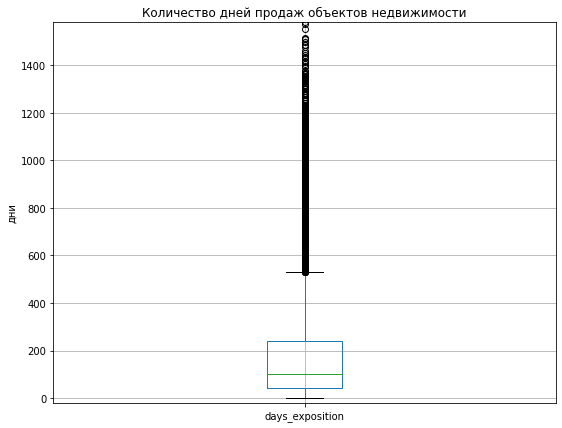

In [199]:
clean_data.boxplot(column='days_exposition', figsize=(9, 7))
plt.title('Количество дней продаж объектов недвижимости')
plt.ylim(-20, 1580)
plt.ylabel('дни')
plt.show()

Поражает количество выбросов, находящихся за пределами верхнего из усов. 
Нужно определить с какого значения начинаются выбросы.
Для начала найдем 1 и 3 квартили и их размах, затем считаем верхнюю границу значений, не являющихся выбросами. 

In [200]:
q1 = clean_data['days_exposition'].quantile(.25) # первый квартиль
q3 = clean_data['days_exposition'].quantile(.75) # третий квартиль
iqr = q3 - q1 #межквартильный размах

display(q3 + 1.5 * iqr)

531.5

Построим гистограмму распределения сроков продажи квартир с учетом вычита выбросов, округлим 531.5 до 532.0

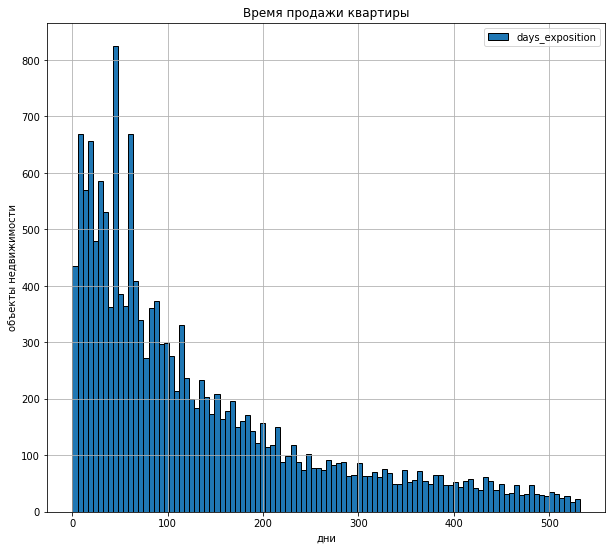

In [201]:
clean_data['days_exposition'].hist(bins = 100,  range  = (0,532), figsize=(10, 9), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов продалась в течение 150 дней. Построим гистограмму только для этих квартир

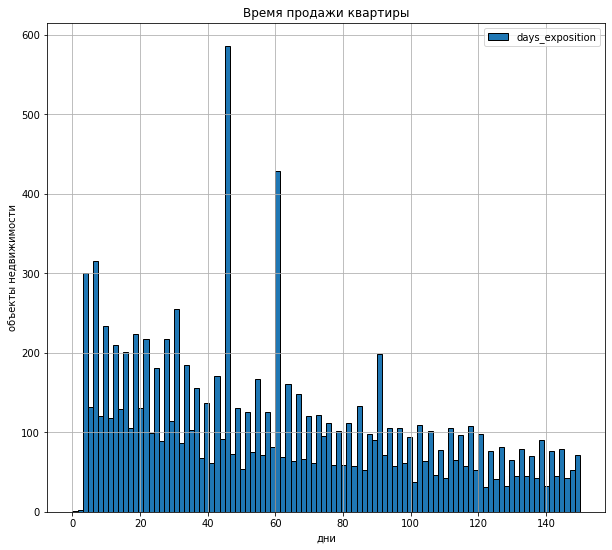

In [202]:
clean_data['days_exposition'].hist(bins = 100,  range  = (0,150), figsize=(10, 9), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Наиболее часто продают квартиры спусня 45, 60 и 90 дней после выкладки объявления. Это подозрительно сходится со сроком публикации объявлений в сервисе Яндекс Недвижимость. Возможно, эти квартиры не были проданы, по ним просто не было продления сроков размещения объявлений.  

**Вывод о сроке размещения объявлений:** быстрой продажей можно считать срок менее 45 дней, нормальной - от 45 до 239 дней, долгой - от 239 до 532 дней. 
Более долгий срок продажи - выбросы. Это могут быть элитные дорогие объекты, которые не доступны для среднестатитистического покупателя недвижимости в Лен. обл.

#### Определяем факторы, которые больше всего влияют на общую (полную) стоимость объекта

Построим корреляционную таблицу для исследуемых данных.

In [203]:
pd.set_option('display.max_columns', None)
clean_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,dayofweek,month,year,center_near
total_images,1.000000,0.115084,0.117782,0.093838,0.048929,0.019248,0.101217,0.036804,0.005710,-0.030278,NaN,0.116385,0.036658,-0.000524,-0.051849,0.018272,-0.008863,-0.012462,0.000566,-0.040801,0.139525,-0.010493,0.003238,0.160176,-0.051305
last_price,0.115084,1.000000,0.691422,0.389632,0.336811,-0.000989,0.604795,0.030483,0.032792,-0.027910,NaN,0.521957,0.002723,-0.029106,-0.225731,0.166286,-0.018062,0.171238,-0.100100,0.088860,0.744460,-0.007114,-0.000369,-0.042624,-0.226186
total_area,0.117782,0.691422,1.000000,0.771173,0.411782,-0.066106,0.940567,-0.018971,0.031864,-0.075084,NaN,0.620653,0.005875,-0.033979,-0.233324,0.168581,-0.018622,0.169031,-0.104675,0.144790,0.305204,-0.009771,0.005474,-0.080985,-0.233204
rooms,0.093838,0.389632,0.771173,1.000000,0.254932,-0.220245,0.846227,-0.146233,-0.003528,-0.150860,NaN,0.294220,-0.020816,-0.062784,-0.186302,0.135291,-0.047385,0.097568,-0.062365,0.124835,0.054381,-0.005852,-0.002912,-0.054164,-0.185850
ceiling_height,0.048929,0.336811,0.411782,0.254932,1.000000,-0.084294,0.392102,-0.044416,0.059341,0.012654,NaN,0.336760,-0.056203,-0.087189,-0.301752,0.231547,-0.061989,0.190989,-0.113304,0.108314,0.306062,-0.021499,-0.003216,-0.054260,-0.301987
floors_total,0.019248,-0.000989,-0.066106,-0.220245,-0.084294,1.000000,-0.162031,0.677745,-0.016501,0.078329,NaN,0.151983,0.185889,0.115699,0.017768,-0.248928,0.104493,-0.123051,0.043468,-0.053689,0.158013,0.009520,0.015885,0.011047,0.017201
living_area,0.101217,0.604795,0.940567,0.846227,0.392102,-0.162031,1.000000,-0.092750,0.028532,-0.055093,NaN,0.444758,-0.018454,-0.056413,-0.230108,0.183426,-0.048141,0.153369,-0.088977,0.138320,0.220785,-0.008521,-0.000563,-0.070250,-0.229785
floor,0.036804,0.030483,-0.018971,-0.146233,-0.044416,0.677745,-0.092750,1.000000,-0.002364,0.041199,NaN,0.128704,0.180854,0.079689,0.008939,-0.158677,0.074396,-0.074822,0.027446,-0.037964,0.134582,0.007905,0.018791,0.008990,0.008480
is_apartment,0.005710,0.032792,0.031864,-0.003528,0.059341,-0.016501,0.028532,-0.002364,1.000000,-0.003109,NaN,0.042984,0.038162,0.003342,-0.007063,0.017594,-0.025292,0.018448,0.008310,0.032374,0.037663,-0.004246,0.004982,-0.007162,-0.007031
studio,-0.030278,-0.027910,-0.075084,-0.150860,0.012654,0.078329,-0.055093,0.041199,-0.003109,1.000000,NaN,-0.142732,0.032920,-0.018767,-0.009566,-0.030571,0.010080,-0.001870,0.006643,-0.023574,0.019515,0.001162,0.001030,0.012361,-0.010174


Линейная взаимосвязь есть между ценой и общей площадью, жилой площадью и площадью кухни. Чем выше значений данных площадей, тем выше стоимость жилья. Взимосвязь между ценой и близостью к центру города описывается так: чем ближе к центру, тем дороже квартира.

Для более наглядного представления постороим графики о зависимости цены к следующим показателям:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

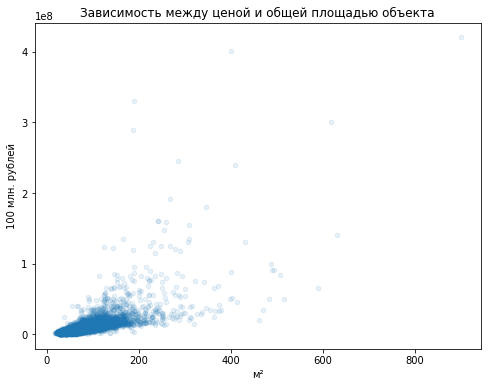

In [204]:
clean_data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', figsize = (8,6), alpha = 0.1)
plt.title('Зависимость между ценой и общей площадью объекта')
plt.xlabel('м²')
plt.ylabel('100 млн. рублей')
plt.show()

По графику видно, что чем больше общая площадь объекта, тем больше его стоимость. То есть зависимость между значениями прямопропорциональная.

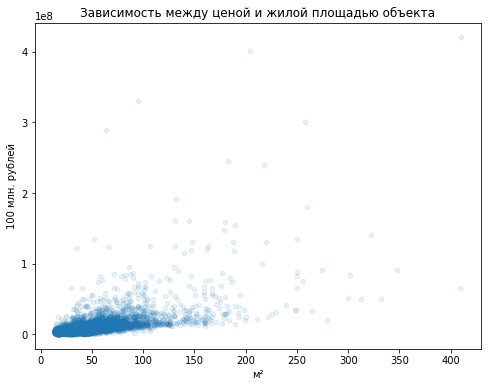

In [205]:
clean_data.plot(x = 'living_area', y = 'last_price', kind = 'scatter', figsize = (8,6), alpha = 0.1)
plt.title('Зависимость между ценой и жилой площадью объекта')
plt.xlabel('м²')
plt.ylabel('100 млн. рублей')
plt.show()

Аналогичная ситуация, она и логичная, что чем больше жилая площадь объекта, тем больше его стоимость. То есть зависимость между значениями прямопропорциональная.

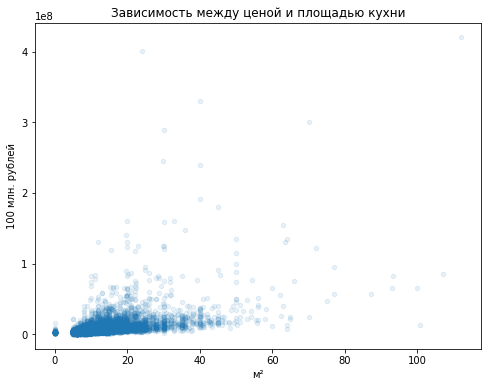

In [206]:
clean_data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter', figsize = (8,6), alpha = 0.1)
plt.title('Зависимость между ценой и площадью кухни')
plt.xlabel('м²')
plt.ylabel('100 млн. рублей')
plt.show()

Аналогичная ситуация,что чем больше площадь кухни, тем больше его стоимость. То есть зависимость между значениями прямопропорциональная.

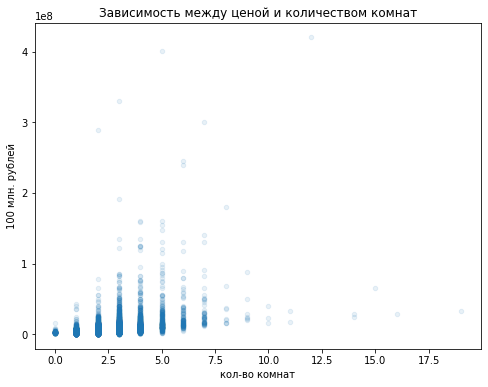

In [207]:
clean_data.plot(x = 'rooms', y = 'last_price', kind = 'scatter', figsize = (8,6), alpha = 0.1)
plt.title('Зависимость между ценой и количеством комнат')
plt.xlabel('кол-во комнат')
plt.ylabel('100 млн. рублей')
plt.show()

Действительно от студии до 4 комнатной квартиры наблюдается линейная зависимость между ценой и количесьтвом комнат, но при дальнейшем увеличении комнат в объекте, его стоимость не увеличивается. Скорее всего, это связано с тем, что на квартиры с большим количеством комнат спрос куда меньше.

,count,mean,median
type_floor,,,
Другие,15206.0,6.707144e+06,4900000.0
Первый,2512.0,4.862918e+06,3980000.0
Последний,2940.0,7.051461e+06,4375000.0


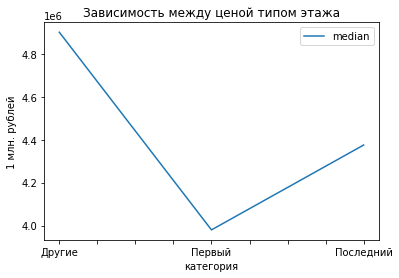

In [208]:
pivot__floor_type = clean_data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = {'mean', 'count', 'median'})
pivot__floor_type.plot(y = 'median', legend=True)
plt.title('Зависимость между ценой типом этажа')
plt.xlabel('категория')
plt.ylabel('1 млн. рублей')
pivot__floor_type 

Как и ожидалось цена на первом и на последнем этаже ниже, чем на этажах между ними. На практике всегда такие квартиры стоили меньше. Первый этаж не устраивает людей тем, что могут залесть воры + прохожие видят твою квартиру через окна, а последний этаж может затопить дождём, если крыша в плохом состоянии или неправильно спроектирована.

##### Зависимость между ценой и датой размещения (день недели, месяц, год).

,count,mean,median
dayofweek,,,
0,3187.0,6.685547e+06,4750000.0
1,3671.0,6.465954e+06,4790000.0
2,3456.0,6.512294e+06,4763500.0
3,3777.0,6.792211e+06,4700000.0
4,3503.0,6.257768e+06,4600000.0
5,1633.0,6.557169e+06,4600000.0
6,1431.0,6.361239e+06,4600000.0


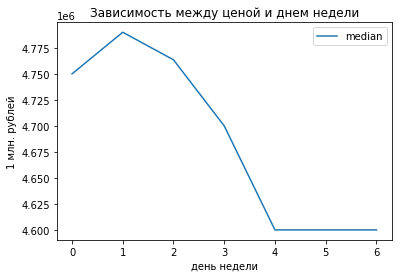

In [209]:
pivot__day = clean_data.pivot_table(index = 'dayofweek', values = 'last_price', aggfunc = {'mean', 'count', 'median'})
pivot__day.plot(y = 'median', legend=True)
plt.title('Зависимость между ценой и днем недели')
plt.xlabel('день недели')
plt.ylabel('1 млн. рублей')
pivot__day 

В понедельник и вторник выкладывают более дорогие квартиры, а со среды выкладывают все более и более дешевые квартиры. Минимальные цены у объектов, выложенных в пятницу и выходные.

,count,mean,median
month,,,
1,1242.0,6.580350e+06,4650000.0
2,2278.0,6.609713e+06,4750000.0
3,2231.0,6.432144e+06,4700000.0
4,2103.0,6.840910e+06,4850000.0
5,1125.0,6.447946e+06,4550000.0
6,1534.0,6.415019e+06,4500000.0
7,1458.0,6.426887e+06,4662500.0
8,1533.0,6.391017e+06,4600000.0
9,1791.0,6.468883e+06,4750000.0


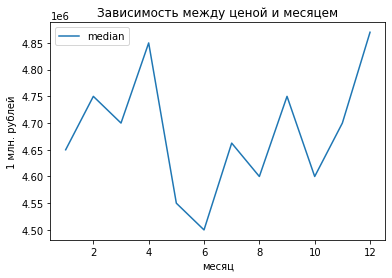

In [210]:
pivot__month = clean_data.pivot_table(index = 'month', values = 'last_price', aggfunc = {'mean', 'count', 'median'})
pivot__month.plot(y = 'median', legend=True)
plt.title('Зависимость между ценой и месяцем')
plt.xlabel('месяц')
plt.ylabel('1 млн. рублей')
pivot__month 

Самые низкие цены на квартиры устанавливают в мае - июне, скорее всего, потому что это период отпусков и потенциальных покупателей в этот период меньше. Еще низкие цены в августе и в октябре. В октябре скорее всего на рынок вторички сильно влияют застройщики, продающие новостройки со скидками на чёрную пятницу. В марте скорее всего снижаетмся покупательская способность ввиду подготовке к школе.

,count,mean,median
year,,,
2014,127.0,1.198755e+07,7580000.0
2015,1038.0,8.376832e+06,5250000.0
2016,2478.0,6.741159e+06,4599500.0
2017,7308.0,6.511888e+06,4550000.0
2018,7162.0,6.041626e+06,4650000.0
2019,2545.0,6.740519e+06,5100000.0


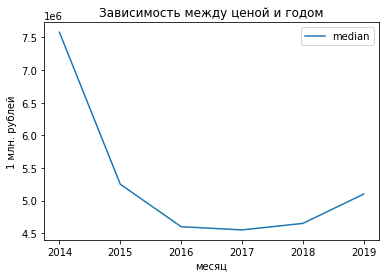

In [211]:
pivot__year = clean_data.pivot_table(index = 'year', values = 'last_price', aggfunc = {'mean', 'count', 'median'})
pivot__year.plot(y = 'median', legend=True)
plt.title('Зависимость между ценой и годом')
plt.xlabel('месяц')
plt.ylabel('1 млн. рублей')
pivot__year 

В период с 2014 по 2017 год выложенные квартиры падали в цене и к 2017 сокращение стоимости составило треть  от значения в 2014. Однако в период с 2017 по 2019 начался постепенный рост цен на недвижимость.

Вывод:

Стоимость квартиры напрямую зависит от общей площади объекта, жилой площади и площади кухни. Чем ближе квартира к центру, тем она дороже. Увеличение количества комнат с 0 до 4 линейно изменяет цену на объект, но с дальнейшим увеличением комнат, тенденция не сохраняется. Объекты на первом и последнем этажах имеют пониженную стоимость, относительно объектов на других этажах. 
В начале недели выкладываются самые дорогие объявления, а в конце - самые дешевые. Наименьшую стоимость имеют квартиры выложенные в марте, июне и октябре.
Самые высокие цены на недвижимость в 2014 г, самые низкие в 2017 г. С 2017 г. постепенно начинается рост цен на недвижимость.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

Самые многочисленные на объекты населенные пункты.

In [212]:
price_meter_pivot = clean_data.pivot_table(index = 'locality_name', values = 'price_one_meter', aggfunc = {'count', 'mean'})
price_meter_pivot1 = price_meter_pivot.sort_values(by = 'count',ascending = False).head(10)
price_meter_pivot1

,count,mean
locality_name,,
санкт-петербург,13915,113802.302190
мурино,427,85650.621429
поселок шушары,380,77970.703632
всеволожск,356,69023.493230
пушкин,332,103352.446536
колпино,320,75193.725719
гатчина,284,68943.609261
поселок парголово,270,90055.615296
кудрово,227,92362.521366


Отсортируем данную таблицу по средней цене квадратного метра.

In [213]:
price_meter_pivot2 = price_meter_pivot1.sort_values(by = 'mean',ascending = False)
price_meter_pivot2

,count,mean
locality_name,,
санкт-петербург,13915,113802.302190
пушкин,332,103352.446536
кудрово,227,92362.521366
поселок парголово,270,90055.615296
мурино,427,85650.621429
петергоф,189,83769.527407
поселок шушары,380,77970.703632
колпино,320,75193.725719
всеволожск,356,69023.493230


Соответственно для этой группы, самый дорогой квадратный метр в Санкт - Петербурге = 113802.302190 рубля, а самый дешевый в Гатчине  = 68943.609261 рубля.

Text(0, 0.5, 'рубли')

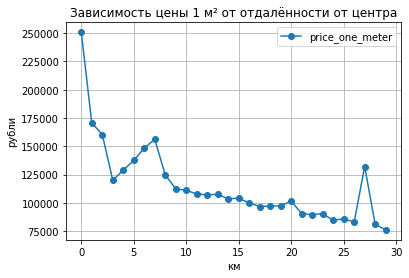

In [214]:
(
    clean_data[clean_data['locality_name']=='санкт-петербург']
    .pivot_table(
        index = 'center_near', 
        values = 'price_one_meter',
        aggfunc = 'mean')
    .plot(style = 'o-', grid = True)

)
plt.title('Зависимость цены 1 м² от отдалённости от центра')
plt.xlabel('км')
plt.ylabel('рубли')

На расстоянии до 2 км цена за 1 м² составляет 160 - 250 тыс., однако на 3 км от центра происходит резкая просадка  стоимостей недвижимости до 125 тыс., скорее всего это выбросы, которые обусловлены очень плачевным состоянием помещений или это мошеннические объявления. Если не брать в расчет расстояние 3 км от центра, то центром можно считать расстояние 8 км от центра. В центре стоимость за 1 м² составляет от 120 тыс до 250 тыс. 
При увеличении расстояния от центра стоимость за 1 м² снижается постепенно со 120 тыс на 9 км до центра до 85 тыс на 26 км от центра.
Пик на 27 км от центра скорее всего обусловлен элитным районом, где стоимость за 1 м² составляет 140 тыс.

### Напишите общий вывод

В данной работе исследованы данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014 - 2019 гг.

Цели исследования: определить временные рамки для быстрой, нормальной и долгой продаж, определить какие из факторов большего всего влияют на стоимость квартиры, определить как изменяется стоимость квартир при отдалении от центра Санкт-Петербурга.

Для решения данных задач были выполнены: предобработка данных, добавлены расчётные столбцы в датасет, построены диаграммы распределения для общей площади, жилой площади, площади кухни, цены объекта, количества комнат, высот потолков, типа этажа квартиры («первый», «последний», «другой»), общего количество этажей в доме, расстояния до центра города в метрах и расстояния до ближайшего парка. Построены графики зависимости цены объекта от общей площади,  жилой площади, площади кухни, количества комнат, типа этажа квартиры и даты размещения (день недели, месяц, год). Построена сводная таблица по самым многочисленным на проданные объекты недвижимости населённым пунктам. Постоен график изменения цены на квадратный метр в Санкт - Петербурге от отдалённости от центра.

Исходя из гистограмм распределений определили характеристики типичного объекта недвижимости - квартира общей площадью 30 или 50 - 52 м², жилая площадь же составляет 10 - 17м² или 36 - 35 м². Площадь кухни такой квартиры от 6.8 м² до 11.0 м². Стоимостью 3.8 млн. рублей. Количество комнат в квартире от 1 до 3 включительно. Высота потолков от 2.4 до 2.75 м. Этажность дома, где распологается типичная квартира: 5 - или 9 - этажка. Сама же квартира находится не на первом и не на последнем этажах, а на 2 - 3 этаже. Расстояние до центра города составляет 14 км. Расстояние до ближайшей парковой зоны - около 500 метров. А так же определили категории по времени продаж: быстрой продажей можно считать срок менее 45 дней, нормальной - от 45 до 239 дней, долгой - от 239 до 532 дней. 

Из графиков зависимости цены от перечисленных выше параметров определили, что стоимость квартиры напрямую зависит от общей площади объекта, жилой площади и площади кухни. Чем ближе квартира к центру, тем она дороже. Увеличение количества комнат с 0 до 4 линейно изменяет цену на объект, но с дальнейшим увеличением комнат, тенденция не сохраняется. Объекты на первом и последнем этажах имеют пониженную стоимость, относительно объектов на других этажах. В начале недели выкладываются самые дорогие объявления, а в конце - самые дешевые. Наименьшую стоимость имеют квартиры выложенные в мае - июне, августе и октябре. Самые высокие цены на недвижимость в 2014 г, самые низкие в 2017 г. С 2017 г. постепенно начинается рост цен на недвижимость.

В населенных пунктах, где много объявлений стоимость м² распределяется так: самый дорогой квадратный метр в Санкт - Петербурге = 113802.302190 рубля, а самый дешевый в Гатчине = 68943.609261 рубля.

В центре СПб цена 1 м² составляет от 125 тыс до 250, причем 125 - 8 км от центра, а 250 - менее 1 км от центра. При увеличении расстояния от центра стоимость за 1 м² снижается постепенно со 120 тыс на 9 км до центра до 85 тыс на 26 км от центра. Средняя стоимость снижения цены 1 м² при отдалении от центра на 1 км для центра 7.5тыс, а для остального города 2.059 тыс. рублей.  

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.